### 1. Project Background

This project aims to explore and apply feature Engineering and dimensionality reduction techniques on second-hand car sales datasets. The goal is to prepare the dataset for machine learning models by creating informative features and reducing the feature space while retaining essential information.
The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise.

### 2. Load Data & Libraries

In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
#load data
data=pd.read_csv(r'C:\Users\Admin\Desktop\Zindua_School\Unsupervised_Machine_Learning\Week1_Principal_Component_Analysis\datasets\second_hand_cars.csv')
data.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


### 3. Data Preprocessing
#### 3.1 Data Cleaning: Handling missing data


In [3]:
#check for missingness
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

Looks like only 2 features have missingness: Variant and  Accessories
Let us explore the missingness even more...

In [4]:
#how much missingness does each have
total_missing=data.isnull().sum().sort_values(ascending=False)
portion_missing=total_missing/data.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,portion_missing],axis=1,keys=['total missing','percent missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percent missing']=missing_df['percent missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total missing,percent missing
variable,,
Accessories,482,19.28
Variant,262,10.48


Only a small percent of data in each feature is missing, now we can proceed to impute the data, first explore the data type- if it is categorical data impute with the mode, if it is numerical data, plot the distribution and impute either by mean or median

In [5]:
#data.Variant

In [6]:
#data.Accessories

In [7]:
data['Accessories'].fillna(data['Accessories'].mode()[0], inplace=True)
data['Variant'].fillna(data['Variant'].mode()[0], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

Now we look for duplicates in the data

In [8]:
duplicated=data[data.duplicated()]
duplicated

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories


There are no deplicated rows in the data frame.

### 4. Feature Engineering

#### 4.1 Creating new features

In [9]:
#Calculating the age of the car from the year of manufacturer
#first convert the column to date time data type
from datetime import datetime
data['Make Year']=pd.to_datetime(data['Make Year'])
#set the year
current_year=2024

def car_age(yom):
    current_year=datetime.today().year
    age= current_year-yom.year
    return age

In [10]:
data['Car Age']=data['Make Year'].apply(car_age)
##data.head()


In [11]:
data['Price per mile']=round(data['Price']/data['Mileage'])
data.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Car Age,Price per mile
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,1970-01-01 00:00:00.000002018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",54,14.0
1,Kia,Seltos,RXE,Petrol,New,1970-01-01 00:00:00.000002020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof,54,12.0
2,Kia,Accord,RXE,Petrol,New,1970-01-01 00:00:00.000002022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof,54,7.0
3,Nissan,Seltos,Highline,Diesel,Used,1970-01-01 00:00:00.000002024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",54,7.0
4,Chevrolet,Kwid,Highline,Petrol,Used,1970-01-01 00:00:00.000002018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",54,8.0


#### 4.2 Data Encoding
Encode all categorical data

In [12]:
#split data into, categorical, numerical and temporal
num_df=data.select_dtypes(include=[np.number])
cat_df=data.select_dtypes(include=[object])

In [13]:
#num_df.head()
#cat_df.head()

Drop the feature registration number, because it is sort of an identifier, model learns nothing from it.

In [14]:
cat_df.drop('Registration Number',axis=1 ,inplace=True)

In [15]:
cat_df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Owner Type,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,Second,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,Third,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof
2,Kia,Accord,RXE,Petrol,New,Second,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof
3,Nissan,Seltos,Highline,Diesel,Used,Third,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,Second,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [16]:
#one hot encoding

ohe=OneHotEncoder(sparse_output=False)
ohe_transform=ohe.fit_transform(cat_df)
encoded_df = pd.DataFrame(ohe_transform, columns=ohe.get_feature_names_out(cat_df.columns))
encoded_df.index = cat_df.index
final_df=pd.concat([num_df,encoded_df],axis=1)
final_df.head()

,Mileage,Price,Car Age,Price per mile,Company Name_Chevrolet,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,...,"Accessories_Sunroof, Leather Seats, Music System, GPS","Accessories_Sunroof, Music System","Accessories_Sunroof, Music System, Alloy Wheels","Accessories_Sunroof, Music System, Alloy Wheels, GPS","Accessories_Sunroof, Music System, Alloy Wheels, Leather Seats","Accessories_Sunroof, Music System, GPS","Accessories_Sunroof, Music System, GPS, Alloy Wheels","Accessories_Sunroof, Music System, GPS, Leather Seats","Accessories_Sunroof, Music System, Leather Seats","Accessories_Sunroof, Music System, Leather Seats, GPS"
0,52798,759107,54,14.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43412,505071,54,12.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95219,635322,54,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70370,483152,54,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85852,712961,54,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.3 Feature Scaling

In [17]:
#spilt the data before scaling
X = final_df.drop('Price', axis=1)
y = final_df['Price']

In [18]:
#perform standard scaling
scaler=StandardScaler()
scaled_df=scaler.fit_transform(X)


### 5. Dimensionality Reduction

In [19]:
#apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_df)
X_pca=pca.transform(scaled_df)
print(scaled_df.shape)
print(X_pca.shape)


(2500, 1108)
(2500, 2)


In [20]:
#heatmap to show correlation between features and principal components
#df_comp=pd.DataFrame(pca.components_,columns=final_df.columns)
#plt.figure(figsize=(12,6))
#sns.heatmap(df_comp,cmap='plasma')

In [21]:
#Explained variance
explained_variance = pca.explained_variance_ratio_*100
print('Explained variance:', explained_variance)

Explained variance: [0.2376651  0.23313588]


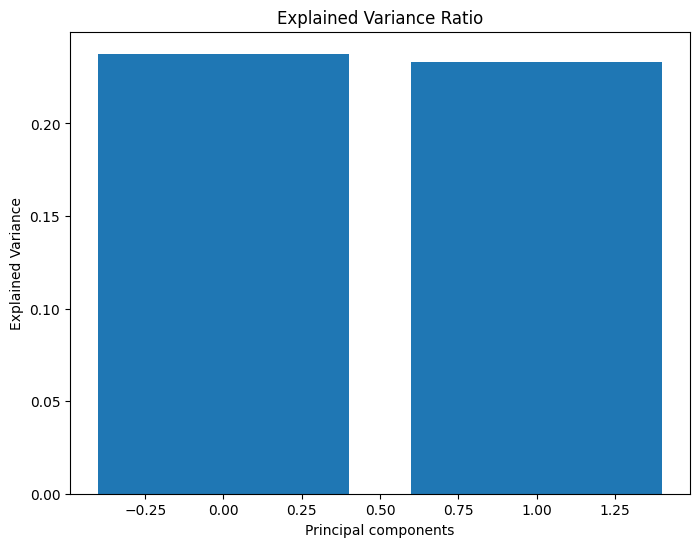

In [22]:
# Plot the explained Variance
plt.figure(figsize=(8,6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel("Principal components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio")
plt.show()

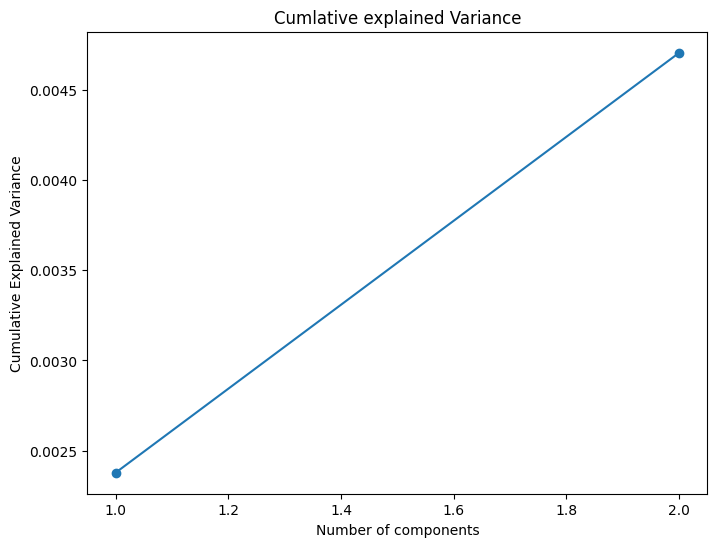

In [23]:
# Cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumlative explained Variance")
plt.show()


The explained variance is very poor, seems the data is not linearly separable and therefore we need to apply kernel PCA instead.

In [24]:
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2)
kpca.fit(X)
X_kpca=kpca.transform(scaled_df)
print(X.shape)
print(X_pca.shape)

(2500, 1108)
(2500, 2)


In [25]:
explained_variance_kernel = np.var(X_kpca,axis=0)
explained_variance_ratio_kernel=(explained_variance_kernel/np.sum(explained_variance_kernel))*100
print('Explained variance ratio:', explained_variance_ratio_kernel)

Explained variance ratio: [49.93608327 50.06391673]


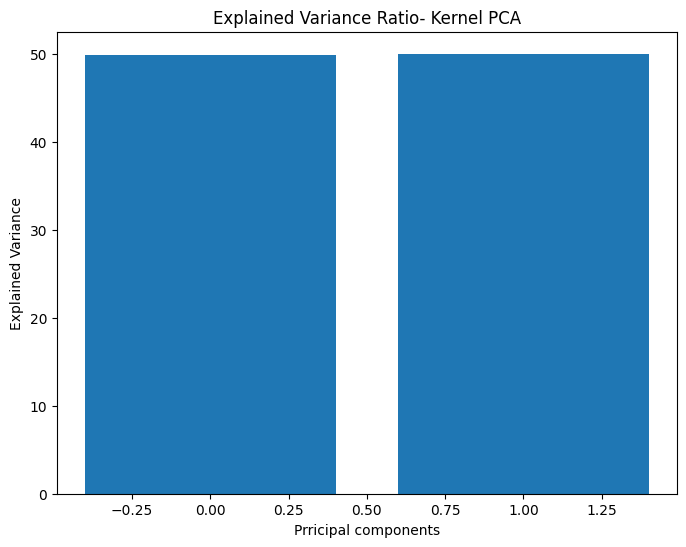

In [26]:
plt.figure(figsize=(8,6))
plt.bar(range(len(explained_variance_ratio_kernel)), explained_variance_ratio_kernel)
plt.xlabel("Prricipal components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio- Kernel PCA")
plt.show()

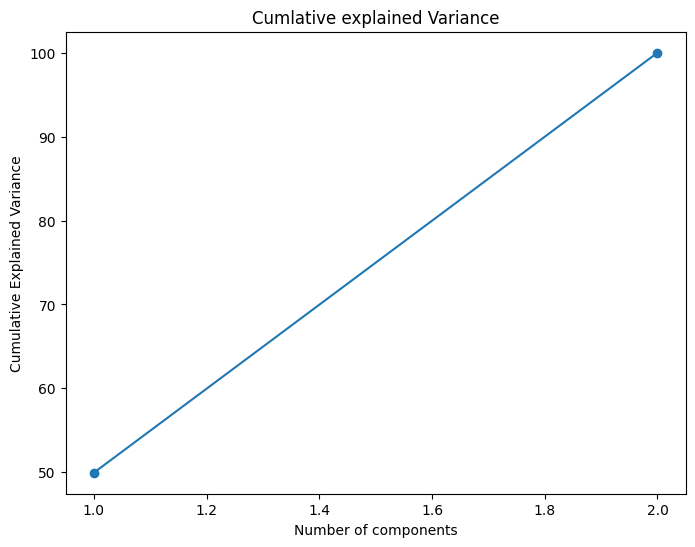

In [27]:
cumulative_variance = np.cumsum(explained_variance_ratio_kernel)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumlative explained Variance")
plt.show()

Kernel PCA gives a better representation of the data.

### 6. Modelling with reduced data
This is a Regression problem- we are trying to predict the Sale price of a car using other features, spilt the data into train and test data.

In [28]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X_kpca,y,test_size=0.2,random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2000, 2) (500, 2) (2000,) (500,)


In [29]:
#Linear regression with no regularization
reg=LinearRegression()
mse_score=make_scorer(mean_squared_error)
scores=cross_val_score(reg, X_train, y_train,cv=5,scoring=mse_score)
print(scores,scores.mean())

[4.26860615e+10 4.17623169e+10 4.36477804e+10 4.62071706e+10
 4.36911124e+10] 43598888386.54668


In [30]:
#Lasso regression
las_model=Lasso()
mse_score=make_scorer(mean_squared_error)
scores=cross_val_score(las_model, X_train, y_train,cv=5,scoring=mse_score)
print(scores,scores.mean())

[4.26861107e+10 4.17623892e+10 4.36477860e+10 4.62071465e+10
 4.36910007e+10] 43598886619.55003


In [31]:
#Support Vector Regression
svr_model=SVR()
mse_score=make_scorer(mean_squared_error)
scores=cross_val_score(svr_model, X_train, y_train,cv=5,scoring=mse_score)
print(scores,scores.mean())

[5.37066366e+10 5.41651453e+10 5.39787142e+10 5.71993340e+10
 5.14123994e+10] 54092445899.718414


In [34]:
#Random Forest Regression
rfr=RandomForestRegressor()
mse_score=make_scorer(mean_squared_error)
scores=cross_val_score(rfr, X_train, y_train,cv=5,scoring=mse_score)
print(scores,scores.mean())

[1.48186681e+09 1.52130492e+09 1.72680338e+09 1.47213181e+09
 1.65269801e+09] 1570960985.1159515


In [38]:
rfr.fit(X_train,y_train)
y_predict=rfr.predict(X_test)
residuals=y_test-y_predict
residuals

1760   -136773.62
2345      5697.50
2370     31108.87
187      27862.39
1911    -45694.50
          ...    
2100     19331.47
335     -15998.28
321      46375.31
1282     50547.15
2334     54437.76
Name: Price, Length: 500, dtype: float64

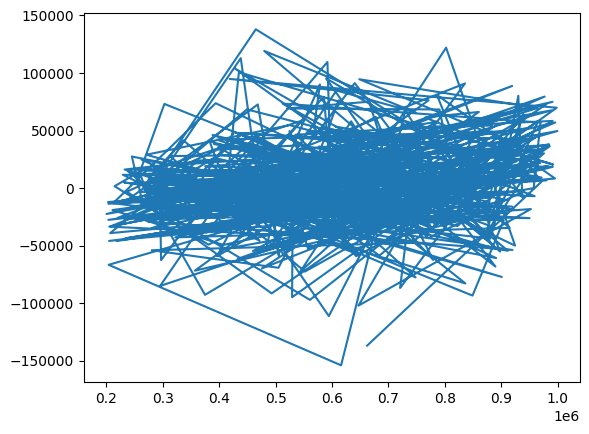

In [45]:
plt.plot(y_test,residuals)